In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import re
import datetime
import matplotlib.pyplot as plt
import numpy as np

month_index = {'May':5, 'Apr':4, 'Mar':3, 'Feb':2, 'Jan':1, 'Dec':12, 'Nov':11, 'Oct':10, 'Sep':9, 'Aug':8, 'Jul':7, 'Jun':6}

In [4]:
def formatDate(date):
    m,d,y = date.replace(',','').split(' ')
    m = str(month_index[m])
    return y+'-'+m+'-'+d

In [5]:
def obtainCloseprice(fname):
    close_price = {}
    open_price = {}
    with open(fname,'r') as fs:
        for line in fs:
            if re.match("Date.*",line):
                continue
            else:
                date,op,high,low,close,vol,mcap = line[:-2].strip().split('|')
                date = formatDate(date)
                close_price[date] = close
                open_price[date] = op
    return open_price,close_price

In [6]:
def sortPricebyTime(c_price):
    day = []
    price = []
    for d,p in sorted(c_price.items(), key = lambda x:datetime.datetime.strptime(x[0], '%Y-%m-%d')):
        day.append(d)
        price.append(float(p))
    return day,price

In [7]:
def findPeriodsofUncertainty(day,price,length):
    price_change = [0]
    for i in range(1,len(price)):
        if price[i] > price[i-1]:
            price_change.append(1)
        elif price[i] < price[i-1]:
            price_change.append(-1)
        else:
            price_change.append(0)

    all_series = []
    dates = []
    volatility_score = {}
    for i in range(len(price)-length):
        change_count = 0
        p_r = []
        d_r = []
        for j in range(length):
            p_r.append(price[i+j])
            d_r.append(day[i+j])
        all_series.append(p_r)
        dates.append(d_r)
        mean_price = np.mean(p_r)
        std_price = np.std(p_r)
        slope = p_r[-1]/p_r[0]
        volatility_score[i] = mean_price/std_price

    sorted_index = []
    for index,score in sorted(volatility_score.items(), key=lambda x:x[1]):
        sorted_index.append(index)

    return sorted_index,all_series,dates

In [306]:
open_price,close_price = obtainCloseprice('ethereum_market_value.csv')
day, price_list = sortPricebyTime(close_price)
index,all_series,dates = findPeriodsofUncertainty(day, price_list, 14)

In [307]:
index

[0,
 575,
 177,
 577,
 176,
 576,
 578,
 178,
 71,
 72,
 175,
 579,
 70,
 574,
 179,
 73,
 74,
 643,
 180,
 644,
 580,
 642,
 1,
 645,
 181,
 75,
 646,
 161,
 160,
 159,
 581,
 199,
 158,
 2,
 182,
 198,
 641,
 162,
 69,
 647,
 200,
 197,
 582,
 76,
 202,
 163,
 648,
 624,
 625,
 201,
 573,
 623,
 649,
 183,
 174,
 852,
 203,
 851,
 626,
 3,
 77,
 853,
 164,
 196,
 157,
 663,
 583,
 664,
 650,
 850,
 622,
 204,
 849,
 665,
 205,
 640,
 621,
 854,
 206,
 874,
 627,
 848,
 165,
 873,
 195,
 662,
 620,
 666,
 68,
 875,
 184,
 194,
 78,
 311,
 156,
 847,
 308,
 876,
 309,
 310,
 307,
 312,
 584,
 651,
 619,
 855,
 306,
 572,
 667,
 877,
 305,
 313,
 4,
 904,
 563,
 6,
 905,
 173,
 193,
 903,
 872,
 564,
 166,
 628,
 5,
 562,
 276,
 207,
 652,
 275,
 696,
 192,
 657,
 304,
 668,
 902,
 561,
 878,
 846,
 274,
 697,
 29,
 656,
 658,
 565,
 661,
 7,
 314,
 185,
 660,
 277,
 871,
 571,
 191,
 585,
 273,
 303,
 30,
 906,
 28,
 856,
 505,
 154,
 722,
 723,
 721,
 698,
 655,
 504,
 659,
 506,
 153

In [12]:
all_series[index[177]]

[337.63,
 333.36,
 330.92,
 332.39,
 347.61,
 354.39,
 366.73,
 360.4,
 380.65,
 410.17,
 474.91,
 466.28,
 471.33,
 480.36]

In [13]:
dates[index[3]]

['2017-3-06',
 '2017-3-07',
 '2017-3-08',
 '2017-3-09',
 '2017-3-10',
 '2017-3-11',
 '2017-3-12',
 '2017-3-13',
 '2017-3-14',
 '2017-3-15',
 '2017-3-16',
 '2017-3-17',
 '2017-3-18',
 '2017-3-19']

In [14]:
price_list

[2.77,
 0.753325,
 0.701897,
 0.708448,
 1.07,
 1.22,
 1.83,
 1.83,
 1.69,
 1.57,
 1.2,
 1.09,
 1.26,
 1.46,
 1.4,
 1.38,
 1.35,
 1.23,
 1.14,
 1.16,
 1.15,
 1.19,
 1.18,
 1.32,
 1.36,
 1.35,
 1.29,
 1.26,
 1.27,
 1.34,
 1.3,
 1.25,
 1.24,
 1.21,
 1.17,
 0.982978,
 1.04,
 0.936003,
 0.875622,
 0.94441,
 0.907175,
 0.874231,
 0.853685,
 0.882391,
 0.938445,
 0.919047,
 0.901796,
 0.893406,
 0.81361,
 0.736223,
 0.785964,
 0.720839,
 0.582886,
 0.661146,
 0.738644,
 0.690215,
 0.678574,
 0.687171,
 0.668379,
 0.628643,
 0.650645,
 0.609388,
 0.621716,
 0.650628,
 0.627857,
 0.634963,
 0.62603,
 0.607655,
 0.522968,
 0.561878,
 0.536495,
 0.547178,
 0.517734,
 0.489014,
 0.434829,
 0.447329,
 0.567702,
 0.539657,
 0.56359,
 0.616039,
 0.731317,
 0.869641,
 1.0,
 1.21,
 1.04,
 0.916627,
 1.06,
 0.989789,
 1.01,
 0.89905,
 0.895637,
 0.926032,
 0.927974,
 1.03,
 0.999278,
 0.934348,
 0.791829,
 0.895711,
 0.904096,
 0.888812,
 0.906368,
 0.928962,
 1.01,
 0.993319,
 0.955532,
 0.92492,
 0.9

In [15]:
all_transactions = pd.read_csv('all_transactions.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
all_transactions.columns

Index(['from', 'to', 'value', 'time', 'block'], dtype='object')

In [17]:
import datetime, time

In [18]:
def dateToUnixTime(date):
    return time.mktime(datetime.datetime.strptime(date, "%Y-%m-%d").timetuple())
    

In [34]:
all_transactions.describe()

,time,block
count,2.049610e+08,2.049610e+08
mean,1.507392e+09,4.392757e+06
std,1.834227e+07,9.723799e+05
min,0.000000e+00,0.000000e+00
25%,1.502965e+09,4.168739e+06
50%,1.512942e+09,4.710441e+06
75%,1.517238e+09,4.994431e+06
max,1.523431e+09,5.420000e+06


In [36]:
all_transactions[(all_transactions.block > 100) & (all_transactions.block<1000)]

,from,to,value,time,block
95229,ethereum,bb7b8287f3f0a933474a79eae42cbca977791171,5000000000000000000,1438270445,101
141185,ethereum,28921e4e2c9d84f4c0f0c0ceb991f45751a0fe93,5000000000000000000,1438270447,102
186089,ethereum,28921e4e2c9d84f4c0f0c0ceb991f45751a0fe93,5000000000000000000,1438270451,103
232438,ethereum,bb7b8287f3f0a933474a79eae42cbca977791171,5000000000000000000,1438270452,104
283254,ethereum,28921e4e2c9d84f4c0f0c0ceb991f45751a0fe93,5000000000000000000,1438270453,105
334657,ethereum,d7e30ae310c1d1800f5b641baa7af95b2e1fd98c,5000000000000000000,1438270454,106
385748,ethereum,d7e30ae310c1d1800f5b641baa7af95b2e1fd98c,5000000000000000000,1438270455,107
441696,ethereum,1b7047b4338acf65be94c1a3e8c5c9338ad7d67c,5000000000000000000,1438270456,108
500647,ethereum,1b7047b4338acf65be94c1a3e8c5c9338ad7d67c,5000000000000000000,1438270459,109
566554,ethereum,19dafe19f11e960e4ccfc6a5aa8890ebd748ca1e,5000000000000000000,1438270464,110


In [19]:
def filterTransactionsbyDate(s_date,e_date): # start date, end date
    s_t = int(dateToUnixTime(s_date))
    e_t = int(dateToUnixTime(e_date))
    print (s_t)
    print (e_t)
    return all_transactions[(all_transactions.time >= s_t) & (all_transactions.time <= e_t)]

In [20]:
df = filterTransactionsbyDate('2017-3-06','2017-3-19')

1488754800
1489878000


In [21]:
df.head()

,from,to,value,time,block
18753511,167a9333bf582556f35bd4d16a7e80e191aa6476,920fd4b8a9648b82a71d0da5234d9aa4eb9ed310,33000000000000000000,1488769189,3299999
18753512,ethereum,61c808d82a3ac53231750dadc13c777b59310bd9,5002100000000000000,1488769189,3299999
18753513,00472c1e4275230354dbe5007a5976053f12610a,cd111aa492a9c77a367c36e6d6af8e6f212e0c8e,0,1488769162,3299998
18753514,00472c1e4275230354dbe5007a5976053f12610a,cd111aa492a9c77a367c36e6d6af8e6f212e0c8e,0,1488769162,3299998
18753515,ethereum,73b8865eda227d6fffabc83c78124dea8c347fea,5002845405454946752,1488769162,3299998


In [22]:
def getInOutdegrees(df): # all transactions in and out of an account
    x = df.groupby('to').count()['from'].to_frame().reset_index().rename(columns={'to':'account','from':'in_trans'})
    y = df.groupby('from').count()['to'].to_frame().reset_index().rename(columns={'from':'account','to':'out_trans'})
    return pd.merge(x,y,how='outer',on=['account']).fillna(0)

In [48]:
x = df.groupby('to').count()['from']

In [51]:
x_1 = x.to_frame().reset_index().rename(columns={'to':'account','from':'in_trans'})

In [52]:
y = df.groupby('from').count()['to']
y_1 = y.to_frame().reset_index().rename(columns={'from':'account','to':'out_trans'})

In [54]:
pd.merge(x_1,y_1,how='outer',on=['account']).fillna(0)

,account,in_trans,out_trans
0,0000000000000000000000000000000000000000,1.0,0.0
1,00000000000000000000000029477ea7ae65dd75,1.0,0.0
2,00000004fdfa473b4b42dda545155a4ce773749b,2.0,1.0
3,0000000d2138b2ee1865cd3e4454c562b9ba7bff,7.0,0.0
4,000001f568875f378bf6d170b790967fe429c81a,2.0,26.0
5,00004aba4ac63de11447e4e17aca83f0abb1fc33,1.0,4.0
6,000058aeb44a69e03ea729c4a9c3ca6190e43aa0,1.0,1.0
7,0000f7e4f494a7b03c29e1a0559c71fcb5186d05,1.0,0.0
8,000108265afa2adbd5808df2187fc8187865020f,1.0,1.0
9,000110fad59080856750eb1762eae0021e032f72,1.0,0.0


In [58]:
df[df['to']=='000001f568875f378bf6d170b790967fe429c81a'].count()

from     2
to       2
value    2
time     2
block    2
dtype: int64

In [284]:
df_degree = getInOutdegrees(df)

In [24]:
def getEthersoldbrought(df): # get for each account amount of ether sold and bought
    x = df.groupby('from').sum()['value'].to_frame().reset_index().rename(columns={'from':'account','value':'value_out'})
    y = df.groupby('to').sum()['value'].to_frame().reset_index().rename(columns={'to':'account','value':'value_in'})
    return pd.merge(x,y,how='outer',on=['account']).fillna(0)

In [25]:
df.columns

Index(['from', 'to', 'value', 'time', 'block'], dtype='object')

In [26]:
df['value'] = df['value'].astype('float64')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
df.groupby('from').sum()['value'].to_frame().reset_index().rename(columns={'from':'account','value':'value_out'})

,account,value_out
0,0000000008b4c94610f112d6bae67a198ca6269d,1.121692e+18
1,00000004fdfa473b4b42dda545155a4ce773749b,5.499375e+16
2,000001f568875f378bf6d170b790967fe429c81a,2.912951e+19
3,00004aba4ac63de11447e4e17aca83f0abb1fc33,5.626726e+20
4,000058aeb44a69e03ea729c4a9c3ca6190e43aa0,5.603188e+14
5,000108265afa2adbd5808df2187fc8187865020f,8.888177e+18
6,00011675f9d83c2fbbd93883f056093ba322e600,5.188794e+18
7,00012b901f9b8051b7c4f2bac2b154724cc9eae1,5.212225e+18
8,000130867755438fcb83dddcb7ed04d89c79780c,1.000100e+22
9,00014853d700ae1f39ba9dbabdec1c8683cf1b2a,0.000000e+00


In [84]:
df[df['from']=='0000000008b4c94610f112d6bae67a198ca6269d']

,from,to,value,time,block
19482238,0000000008b4c94610f112d6bae67a198ca6269d,621f844d9fbdae258a545f561081528f3da86b0e,1.121692e+18,1489628314,3359410


In [281]:
df_value = getEthersoldbrought(df)

In [86]:
all_transactions[all_transactions['from']=='ae4f56f072c34c0a65b3ae3e4db797d831439d93']

,from,to,value,time,block


In [31]:
a_f = df['from'].unique()

In [32]:
a_t = df['to'].unique()

In [33]:
all_addresses = np.union1d(a_f,a_t)

In [34]:
address_map = {}
for i,v in enumerate(all_addresses):
    address_map[v] = i

In [36]:
del address_map['ethereum']

In [37]:
len(address_map)

176879

In [42]:
df.shape[0]

1062352

In [43]:
df_net = df[['from','to']]

In [45]:
df_net.head() # remove the 0 value transactions...


,from,to
18753511,167a9333bf582556f35bd4d16a7e80e191aa6476,920fd4b8a9648b82a71d0da5234d9aa4eb9ed310
18753512,ethereum,61c808d82a3ac53231750dadc13c777b59310bd9
18753513,00472c1e4275230354dbe5007a5976053f12610a,cd111aa492a9c77a367c36e6d6af8e6f212e0c8e
18753514,00472c1e4275230354dbe5007a5976053f12610a,cd111aa492a9c77a367c36e6d6af8e6f212e0c8e
18753515,ethereum,73b8865eda227d6fffabc83c78124dea8c347fea


In [46]:
df_net_filtered = df_net[df_net['from']!='ethereum']

In [47]:
df_net_filtered.head()

,from,to
18753511,167a9333bf582556f35bd4d16a7e80e191aa6476,920fd4b8a9648b82a71d0da5234d9aa4eb9ed310
18753513,00472c1e4275230354dbe5007a5976053f12610a,cd111aa492a9c77a367c36e6d6af8e6f212e0c8e
18753514,00472c1e4275230354dbe5007a5976053f12610a,cd111aa492a9c77a367c36e6d6af8e6f212e0c8e
18753516,593c97a298bacbdfcf1a820772bdb2fd564a7a1b,42682df62ed39520bb27822e211060b417ab987b
18753517,00472c1e4275230354dbe5007a5976053f12610a,cd111aa492a9c77a367c36e6d6af8e6f212e0c8e


In [56]:
df_filtered = df[(df['from']!='ethereum') & (df['value']>0) & (df['to']!='ethereum')]

In [57]:
df_filtered.head()

,from,to,value,time,block
18753511,167a9333bf582556f35bd4d16a7e80e191aa6476,920fd4b8a9648b82a71d0da5234d9aa4eb9ed310,3.300000e+19,1488769189,3299999
18753516,593c97a298bacbdfcf1a820772bdb2fd564a7a1b,42682df62ed39520bb27822e211060b417ab987b,2.000000e+18,1488769158,3299997
18753518,9b44ad6ac17e3e56c77f9f09bca2fc78ba898ba3,b7244bc40f634d586b1c78812b2ea0e65d6814a1,1.000000e+15,1488769158,3299997
18753520,aae74a4e354072dc8cf22d8305233a38f392b6a6,24f21c22f0e641e2371f04a7bb8d713f89f53550,1.948150e+17,1488769153,3299996
18753521,ea674fdde714fd979de3edf0f56aa9716b898ec8,fe54879605e5d8951cf9374a9c0593f8441e6f97,1.014981e+18,1488769153,3299996


In [147]:
df_net = df_filtered[['from','to']]

In [148]:
df_net.head()

,from,to
18753511,167a9333bf582556f35bd4d16a7e80e191aa6476,920fd4b8a9648b82a71d0da5234d9aa4eb9ed310
18753516,593c97a298bacbdfcf1a820772bdb2fd564a7a1b,42682df62ed39520bb27822e211060b417ab987b
18753518,9b44ad6ac17e3e56c77f9f09bca2fc78ba898ba3,b7244bc40f634d586b1c78812b2ea0e65d6814a1
18753520,aae74a4e354072dc8cf22d8305233a38f392b6a6,24f21c22f0e641e2371f04a7bb8d713f89f53550
18753521,ea674fdde714fd979de3edf0f56aa9716b898ec8,fe54879605e5d8951cf9374a9c0593f8441e6f97


In [149]:
all_addresses = np.union1d(df_filtered['from'].unique(),df_filtered['to'].unique())

In [66]:
len(all_addresses)

171757

In [67]:
address_map = {}
for index,add in enumerate(all_addresses):
    address_map[add] = index

In [69]:
df_net['from'] = df_net['from'].apply(lambda x:address_map[x])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
df_net['to'] = df_net['to'].apply(lambda x:address_map[x])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
df_net.head()

,from,to
18753511,15844,98532
18753516,60553,45390
18753518,104640,123278
18753520,115060,25335
18753521,157282,170488


In [72]:
import igraph

In [73]:
from igraph import *

In [74]:
g = Graph()

In [80]:
g.add_vertices(3)

In [81]:
g.add_edges([(1,2),(0,1)])

In [82]:
print(g)

IGRAPH U--- 3 2 --
+ edges:
1--2 0--1


In [84]:
g.add_edges([(1,2)])

In [85]:
summary(g)

IGRAPH U--- 3 3 -- 


In [86]:
print(g)

IGRAPH U--- 3 3 --
+ edges:
1--2 0--1 1--2


In [89]:
g.are_connected(0,2)

False

In [90]:
g.get_edgelist()

[(1, 2), (0, 1), (1, 2)]

In [91]:
g.get_eid(1,2)

2

In [92]:
g.delete_edges(2)

In [93]:
summary(g)

IGRAPH U--- 3 2 -- 


In [94]:
g.get_edgelist()

[(1, 2), (0, 1)]

In [95]:
g.get_adjacency()

Matrix([[0, 1, 0], [1, 0, 1], [0, 1, 0]])

In [96]:
d_g = Graph(directed=True)

In [97]:
d_g.add_vertices(3)

In [98]:
d_g.add_edges([(1,2),(0,1)])

In [103]:
print(g.k_core()[1])

IGRAPH U--- 3 2 --
+ edges:
1--2 0--1


In [104]:
g_1 = Graph()

In [105]:
g_1.add_vertices(6)

In [106]:
g_1.add_edges([(0,1),(1,2),(2,3),(2,4),(1,4),(4,5)])

In [107]:
summary(g_1)

IGRAPH U--- 6 6 -- 


In [109]:
cores = g_1.k_core()

In [115]:
summary(cores[2])

IGRAPH U--- 3 3 -- 


In [116]:
g_2 = Graph()

In [117]:
g_2.add_vertices(8)

In [118]:
g_2.add_edges([(0,1),(0,2),(0,3),(0,7),(1,2),(1,3),(1,6),(2,3),(2,5),(3,4)])

In [119]:
summary(g_2)

IGRAPH U--- 8 10 -- 


In [120]:
cores = g_2.k_core()

In [121]:
summary(cores[0])

IGRAPH U--- 8 10 -- 


In [127]:
summary(cores[6])

IGRAPH U--- 0 0 -- 


In [132]:
summary(cores[2])

IGRAPH U--- 4 6 -- 


In [133]:
cores[1].vs

In [152]:
df_net = df_net.rename(columns={'from':'s','to':'d'})

In [184]:
for row in df_net_sample.itertuples():
    print(row.s,row.d)
    break

9535b2e7faaba5288511d89341d94a38063a349b 9e0b9ddba97dd4f7addab0b5f67036eebe687606


In [154]:
G_transaction = Graph(directed=True)

In [155]:
df_net_sample = df_net.sample(100)

In [158]:
all_addresses = np.union1d(df_net_sample['s'].unique(),df_net_sample['d'].unique())

In [159]:
G_transaction.add_vertices(len(all_addresses))

In [160]:
G_transaction.vs['addr'] = all_addresses

In [186]:
for row in df_net_sample.itertuples():
    x,y = row.s,row.d
    break

In [188]:
G_transaction.vs.find(addr=x).index

82

In [191]:
G_transaction.vs[82]['addr']

'9535b2e7faaba5288511d89341d94a38063a349b'

In [201]:
def create_graph(df):
    df_filtered = df[(df['value']>0) & (df['from']!='ethereum')][['from','to']].rename(columns={'from':'s','to':'d'}).drop_duplicates()
    all_addresses = np.union1d(df_filtered['s'].unique(),df_filtered['d'].unique())
    print('found addresses: ',len(all_addresses))
    G = Graph(directed=True)
    G.add_vertices(len(all_addresses))
    G.vs['addr'] = all_addresses
    print('added nodes and attributes')
    edges = []
    for row in df_filtered.itertuples():
        x,y=row.s,row.d
        u = G.vs.find(addr=x).index
        v = G.vs.find(addr=y).index
        edges.append((u,v))
    print('obtained all edges... inserting now')    
    G.add_edges(edges)    
    return G

In [202]:
G = create_graph(df)

In [203]:
summary(G)

IGRAPH D--- 171757 321435 -- 
+ attr: addr (v)


In [204]:
cores = G.k_core()

In [205]:
len(cores)

171757

In [206]:
core_num = np.zeros(171757)

In [215]:
def countNodes(G):
    cnt = 0
    for n in G.vs:
        cnt+=1
    return cnt    

In [227]:
summary(cores[2])

IGRAPH D--- 124768 275554 -- 
+ attr: addr (v)


In [266]:
def getCoreNum(G,cores):
    #cores = G.k_core()
    node_cnt = countNodes(cores[0])+1
    core_num = {}
    i=1
    while i<len(cores):
        
        if countNodes(cores[i])==0:
            break
        elif countNodes(cores[i])<node_cnt: # change in core number
            # assign new core numbers...
            node_cnt = countNodes(cores[i])
            lst = [v['addr'] for v in cores[i].vs]
            for n in lst:
                core_num[n] = i
        else:
            continue
                        
        i+=1
    return core_num    
        
        

In [268]:
core_num = getCoreNum(G,cores)

In [269]:
len(core_num)

171757

In [256]:
lst = [v['addr'] for v in cores[10].vs]

In [258]:
%load_ext Cython

In [261]:
len(lst)

117

In [279]:
core_num = getCoreNum(G,cores)

In [283]:
for addr,val in sorted(core_num.items(),key = lambda x:x[1],reverse=True):
    print(addr,val)
    break

001a313e182e8ab1ca65803af7058a2e3cf31e02 12


In [282]:
df_value[df_value['account']=='001a313e182e8ab1ca65803af7058a2e3cf31e02']

,account,value_out,value_in
101,001a313e182e8ab1ca65803af7058a2e3cf31e02,3.099360e+19,3.100000e+19


In [285]:
df_degree[df_degree['account']=='001a313e182e8ab1ca65803af7058a2e3cf31e02']

,account,in_trans,out_trans
116,001a313e182e8ab1ca65803af7058a2e3cf31e02,2.0,14.0


In [295]:
df_degree.sort_values('in_trans')[-20:]

,account,in_trans,out_trans
48538,4bb96091ee9d802ed039c4d1a5f6216f90f81b01,4563.0,4308.0
113956,b36cbe7f95a39984384e6aa4068b02c1697ef80e,5290.0,398.0
157538,f90c9ac616ecfefb3860aaa5bc33caf9bc606441,5362.0,416.0
80898,7ed1e469fcb3ee19c0366d829e291451be638e59,5800.0,2825.0
122486,c0ea08a2d404d3172d2add29a45be56da40e2949,6062.0,12.0
113430,b2930b35844a230f00e51431acae96fe543a0347,6120.0,6428.0
109152,abbb6bebfa05aa13e908eaa492bd7a8343760477,6432.0,0.0
19880,1e9939daaad6924ad004c2560e90804164900341,7718.0,23246.0
100559,9e0b9ddba97dd4f7addab0b5f67036eebe687606,8466.0,30271.0
147725,e94b04a0fed112f3664e45adb2b8915693dd5ff3,10613.0,0.0


In [291]:
core_num['209c4784ab1e8183cf58ca33cb740efbf3fc18ef']

5

In [292]:
df_value[df_value['account']=='209c4784ab1e8183cf58ca33cb740efbf3fc18ef']

,account,value_out,value_in
147141,209c4784ab1e8183cf58ca33cb740efbf3fc18ef,0.0,4.282300e+24


In [296]:
core_num['61c808d82a3ac53231750dadc13c777b59310bd9']

8

In [297]:
df_value[df_value['account']=='61c808d82a3ac53231750dadc13c777b59310bd9']

,account,value_out,value_in
55062,61c808d82a3ac53231750dadc13c777b59310bd9,7.946240e+22,7.728468e+22


In [303]:
def errorInBalance(df):
    # calculate balance based on transaction..
    df_value = getEthersoldbrought(df)
    df_value['balance'] = df_value['value_in']-df_value['value_out']
    return df_value

In [299]:
df_value['balance'] = df_value['value_in']-df_value['value_out']

In [300]:
df_value.columns

Index(['account', 'value_out', 'value_in', 'balance'], dtype='object')

In [302]:
df_value.iloc[1]

account      00000004fdfa473b4b42dda545155a4ce773749b
value_out                                 5.49937e+16
value_in                                  1.16538e+17
balance                                   6.15446e+16
Name: 1, dtype: object

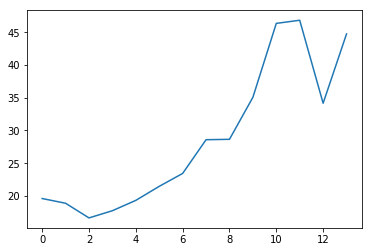

In [313]:
import matplotlib.pyplot as plt
plt.plot(all_series[index[3]])

958


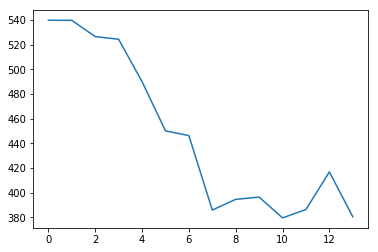

In [334]:
x = index[200]
print (x)
plt.plot(all_series[x])

In [338]:
b_c = G.betweenness()

In [ ]:
# define transactions before a given time


In [339]:
all_transactions.columns

Index(['from', 'to', 'value', 'time', 'block'], dtype='object')

In [371]:
df_trans = filterTransactionsbyDate('2017-10-29','2017-11-12')

1509228000
1510441200


In [364]:
#df_trans.columns
df_trans = df_trans[(df_trans['to'].isin(all_addresses))|(df_trans['from'].isin(all_addresses))]

In [365]:
df_trans.head()

,from,to,value,time,block
10879866,ethereum,2a65aca4d5fc5b5c859090a6c34d164135398226,5000000000000000000,1475748554,2389998
10879868,ea674fdde714fd979de3edf0f56aa9716b898ec8,17078f9f1d1361556f08e575381d9ace4b4ea09f,1004418191902705200,1475748541,2389997
10879869,267be1c1d684f78cb4f6a176c4911b741e4ffdc0,f28a3491cce6ca54c44699f08aaaf891e4230cae,995000000000000000,1475748541,2389997
10879872,ea674fdde714fd979de3edf0f56aa9716b898ec8,2063f2eb1bf0e897a188e79dafd8d64e47a69ba6,1000796699939305100,1475748541,2389997
10879873,ea674fdde714fd979de3edf0f56aa9716b898ec8,27dce8505ce928b95a5c5dc0b6c356e1846e716b,1000426341878256000,1475748541,2389997


In [355]:
'2a65aca4d5fc5b5c859090a6c34d164135398226' in all_addresses

True

In [366]:
df_net_before = getInOutdegrees(df_trans)

In [367]:
df_net_before_filtered = df_net_before[df_net_before['account'].isin(all_addresses)]

In [368]:
df_net_before_filtered

,account,in_trans,out_trans
469,0064454b14cddc990ed6520ef94d3e28fe7c41b6,8279.0,7.0
791,00ab02bdc4f2fddbb4e62a6d7b28160606bbc0d4,8.0,3.0
4345,08390d995e0938e8ecba20fab96e4663d73a2286,9.0,3.0
5353,0aab2f1cbb24e78d1e6e889020dd527d3c1acfae,6.0,1146.0
7577,0f8c0798e753afd38001c084cbb69d5ffa779be7,235.0,235.0
10729,16f0251c5c1e51911337993fc2a256a71afdb891,20.0,20.0
11408,1883409682e1b5b61937ae606ecdca464858d6e2,1.0,1.0
12000,19ee2662eca2e422061ce84f4a69e02c72f9785a,115.0,115.0
12823,1bdf56bb6688609b30277a031cfadfbaa161d4eb,14.0,14.0
14006,1e90116b5854e4b251515dd36e2912d0049746dc,115.0,115.0


In [372]:
df_trans.count()

from     6783441
to       6783441
value    6783441
time     6783441
block    6783441
dtype: int64